In [1]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
    BiocManager::install("phyloseq")

Bioconductor version '3.16' is out-of-date; the current release version '3.21'
  is available with R version '4.5'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.26), R 4.2.3 (2023-03-15)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'phyloseq'”
Old packages: 'ade4', 'ape', 'askpass', 'bit', 'bit64', 'bitops', 'broom',
  'bslib', 'cli', 'cluster', 'colorspace', 'curl', 'data.table', 'dbplyr',
  'digest', 'dtplyr', 'evaluate', 'fontawesome', 'forcats', 'fs', 'gargle',
  'generics', 'glue', 'googledrive', 'googlesheets4', 'haven', 'Hmisc', 'hms',
  'igraph', 'jsonlite', 'knitr', 'lattice', 'lubridate', 'magrittr', 'mgcv',
  'mime', 'nlme', 'openssl', 'pbdZMQ', 'permute', 'pillar'

In [2]:
require(data.table)
require(dplyr)
require(tidyverse)
require(dada2)
require(phyloseq)
require(genefilter)
require(ggplot2)
require(vegan)
require(RColorBrewer)
require(metacoder)
options(repr.plot.width=20, repr.plot.height=15)
supressWarnings()

Loading required package: data.table

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   4.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::l

ERROR: Error in supressWarnings(): could not find function "supressWarnings"


In [3]:
ps<-readRDS(file = "/work/pi_sarah_gignouxwolfsohn_uml_edu/caroline/RDS/ps.rds")
#removing any taxa that don't show up in any samples to speed up the process
ps <- prune_taxa(taxa_sums(ps) > 0, ps)

In [4]:
#normalizing ps by converting rawcounts into relative abundances
#so samples with more reads wont be over represented
#using ps bc only to the count data (OTU table), while preserving the rest of the object
ps_norm = transform_sample_counts(ps, function(x) 1E6 * x / sum(x))

In [5]:
#isolate just bacteria
ps_norm_bac=subset_taxa(ps_norm, Kingdom=="Bacteria")
ps_norm_bac

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 82630 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 82630 taxa by 6 taxonomic ranks ]

In [6]:
#remove chloroplast order
ps_norm_nochlo=subset_taxa(ps_norm_bac, Order!="Chloroplast")
ps_norm_nochlo

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 60624 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 60624 taxa by 6 taxonomic ranks ]

In [7]:
theme_set(theme_bw())

In [8]:
#choosing plot colors 
mycolors= colorRampPalette(brewer.pal(8, "Set3"))(4)

In [16]:
ps_norm_nochlo_glom=tax_glom(ps_norm_nochlo, taxrank="Order")

In [17]:
top10 <- names(sort(taxa_sums(ps_norm_nochlo_glom), decreasing=TRUE))[1:10] 
#ps.top20 <- transform_sample_counts(ps_norm, function(OTU) OTU/sum(OTU)) 
ps_norm_nochlo_glom_top10 <- prune_taxa(top10, ps_norm_nochlo_glom) 

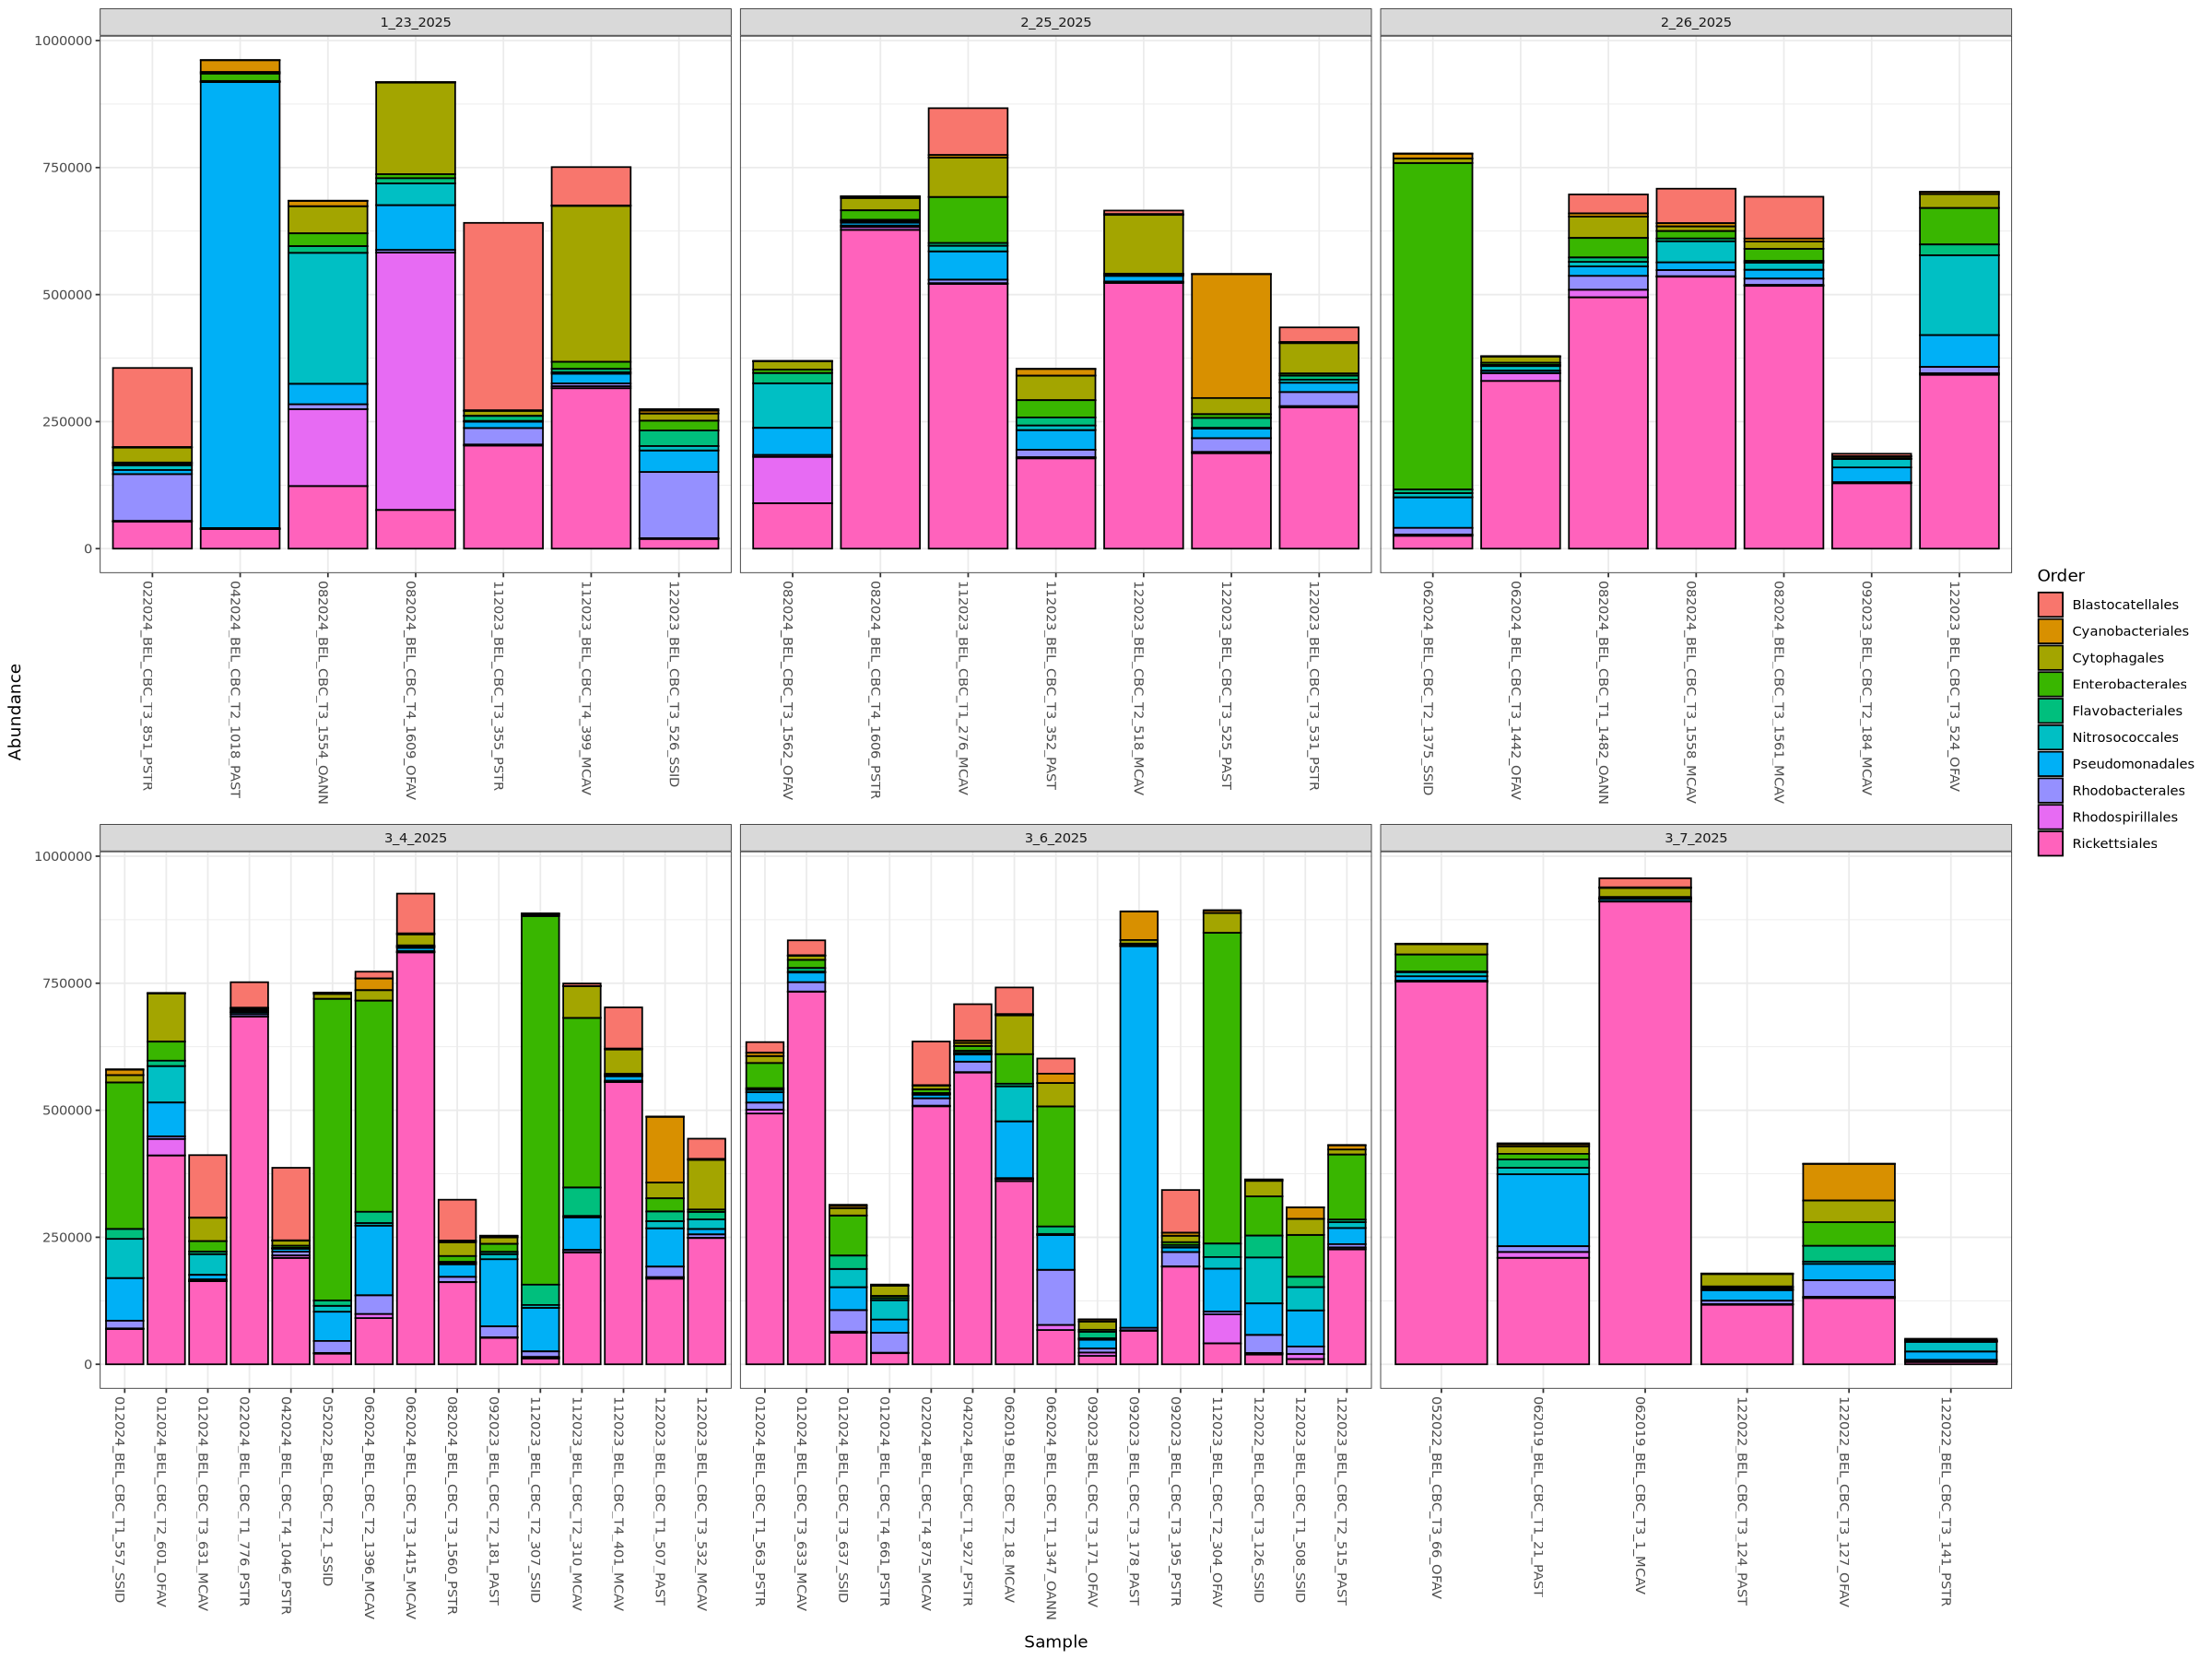

In [18]:
plot_bar(ps_norm_nochlo_glom_top10, fill="Order")+ facet_wrap(~Date_16S, scales="free_x")

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the phyloseq package.
  Please report the issue at <https://github.com/joey711/phyloseq/issues>.”


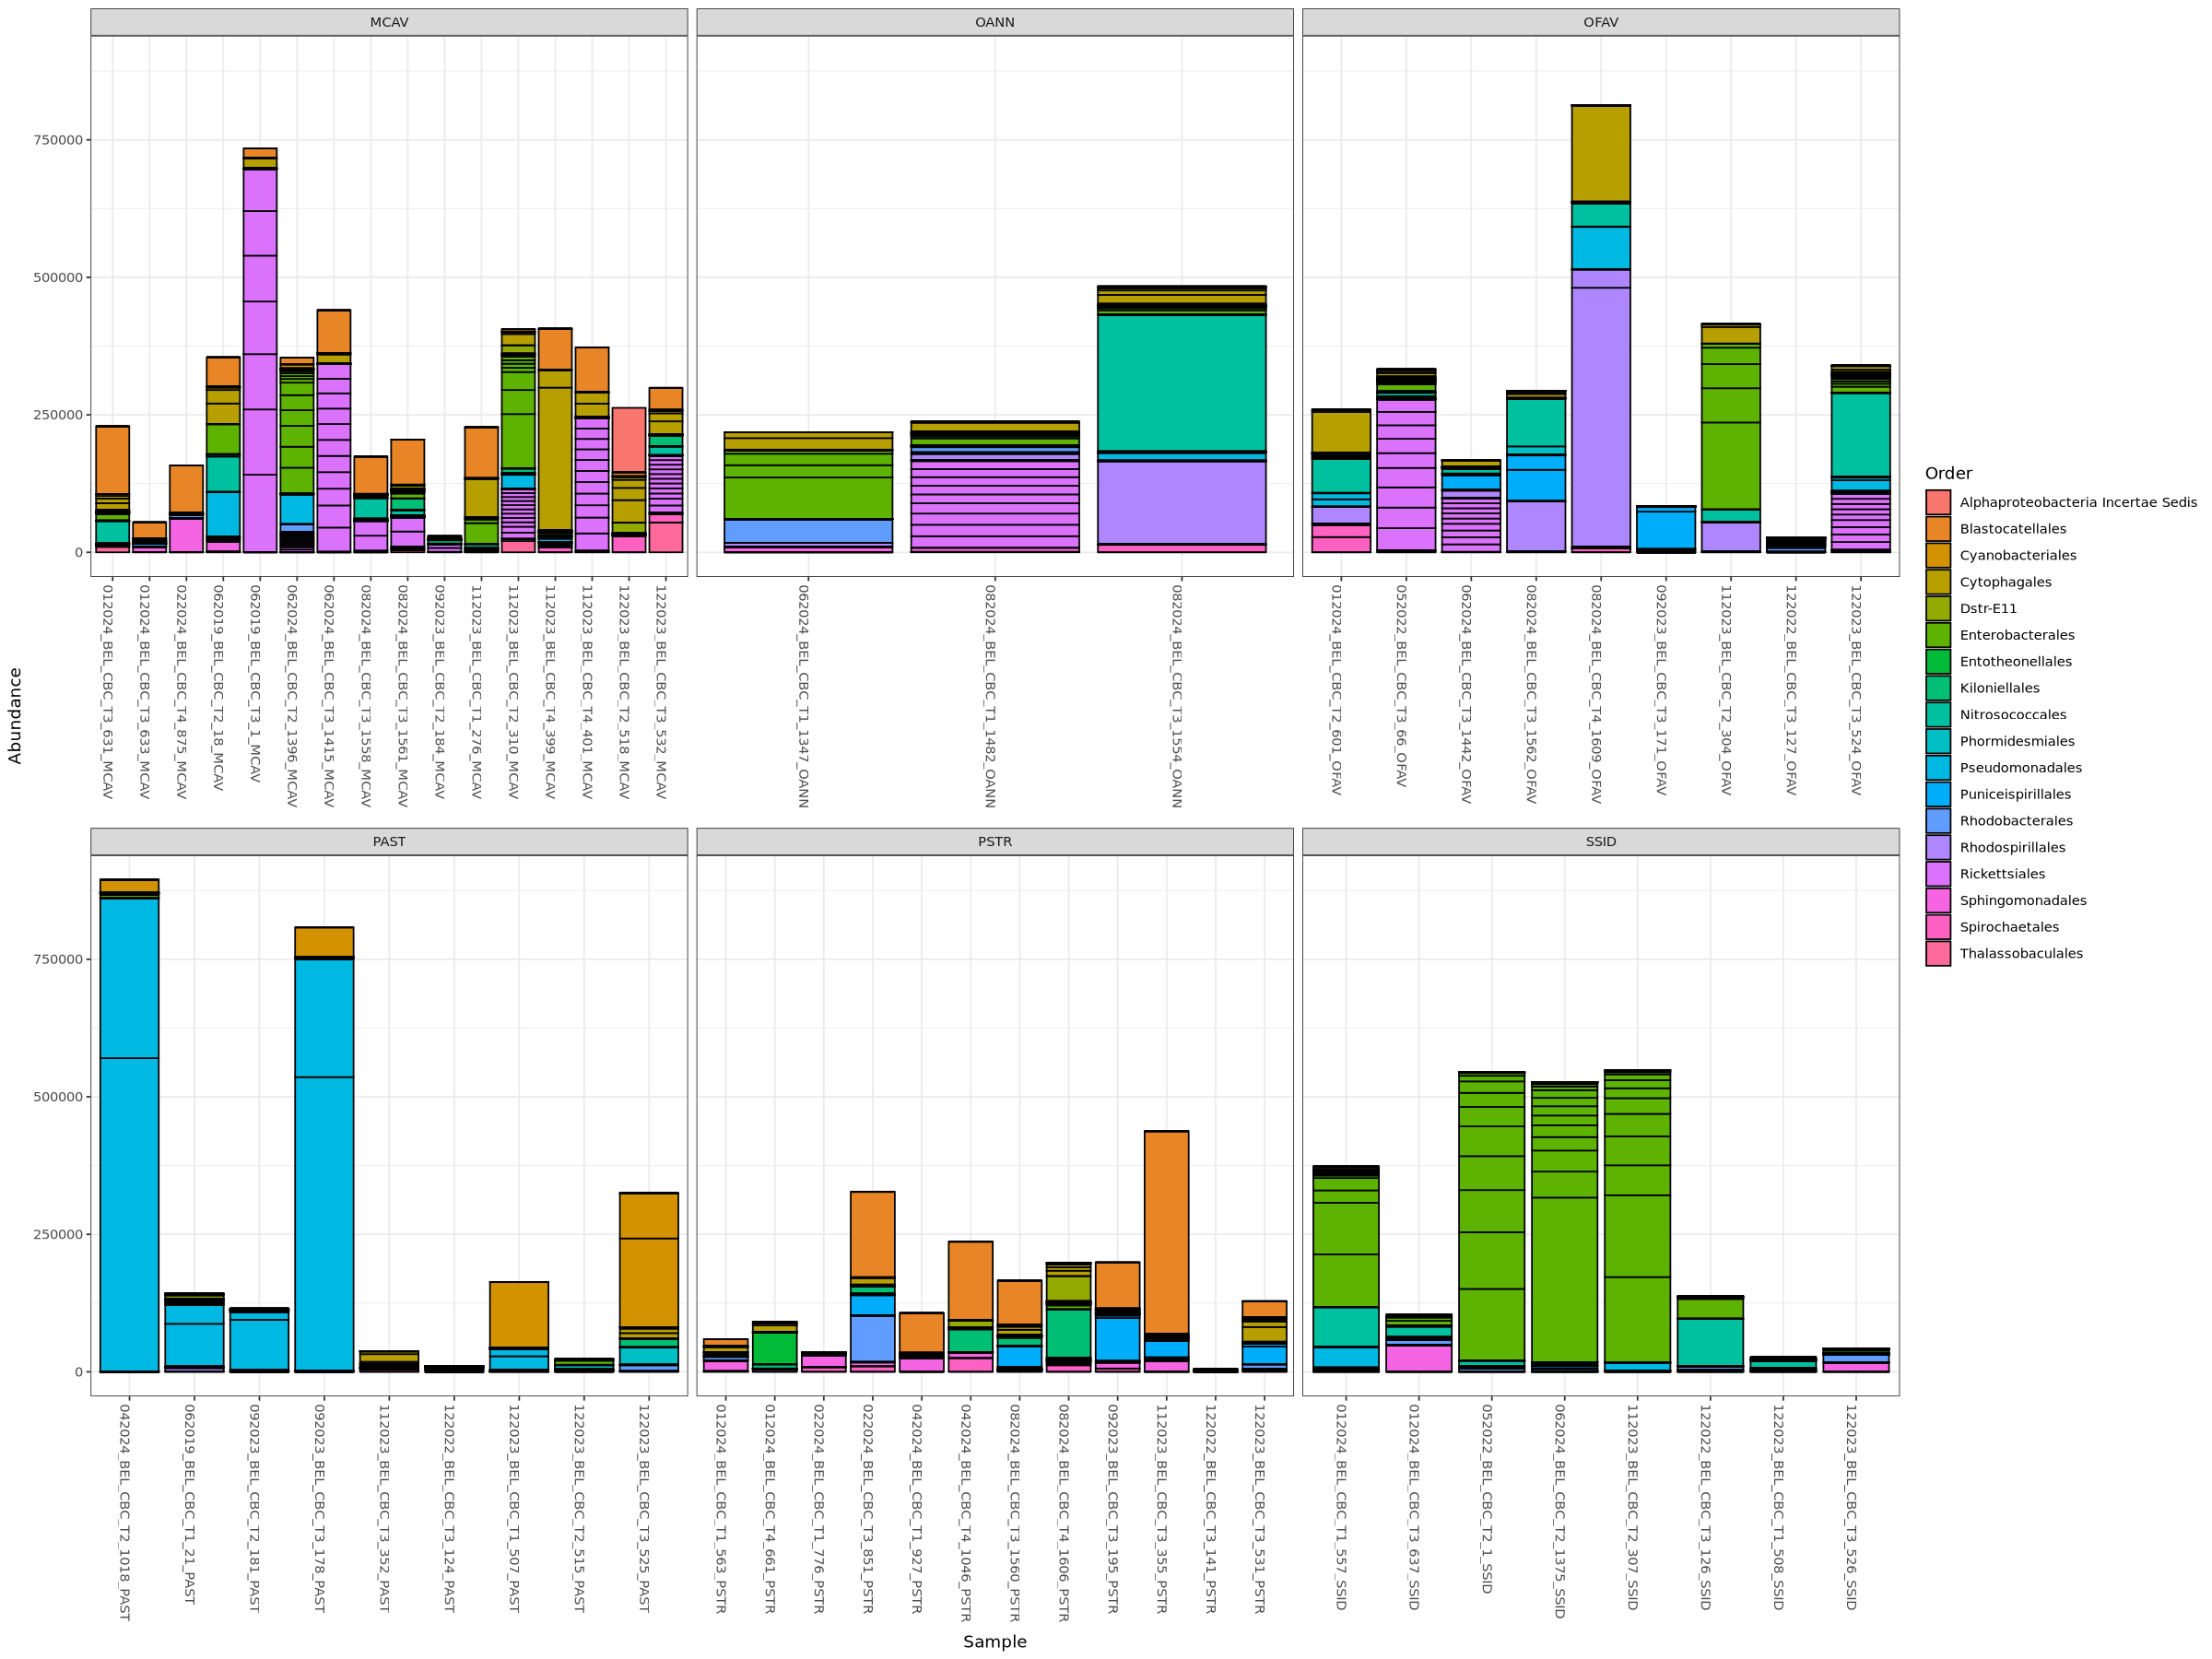

In [11]:
#plot after removing chloroplast
top100 <- names(sort(taxa_sums(ps_norm_nochlo), decreasing=TRUE))[1:100] 
#ps.top20 <- transform_sample_counts(ps_norm, function(OTU) OTU/sum(OTU)) 
ps.top100 <- prune_taxa(top100, ps_norm_nochlo) 
plot_bar(ps.top100, fill="Order") + facet_wrap(~species, scales="free_x")

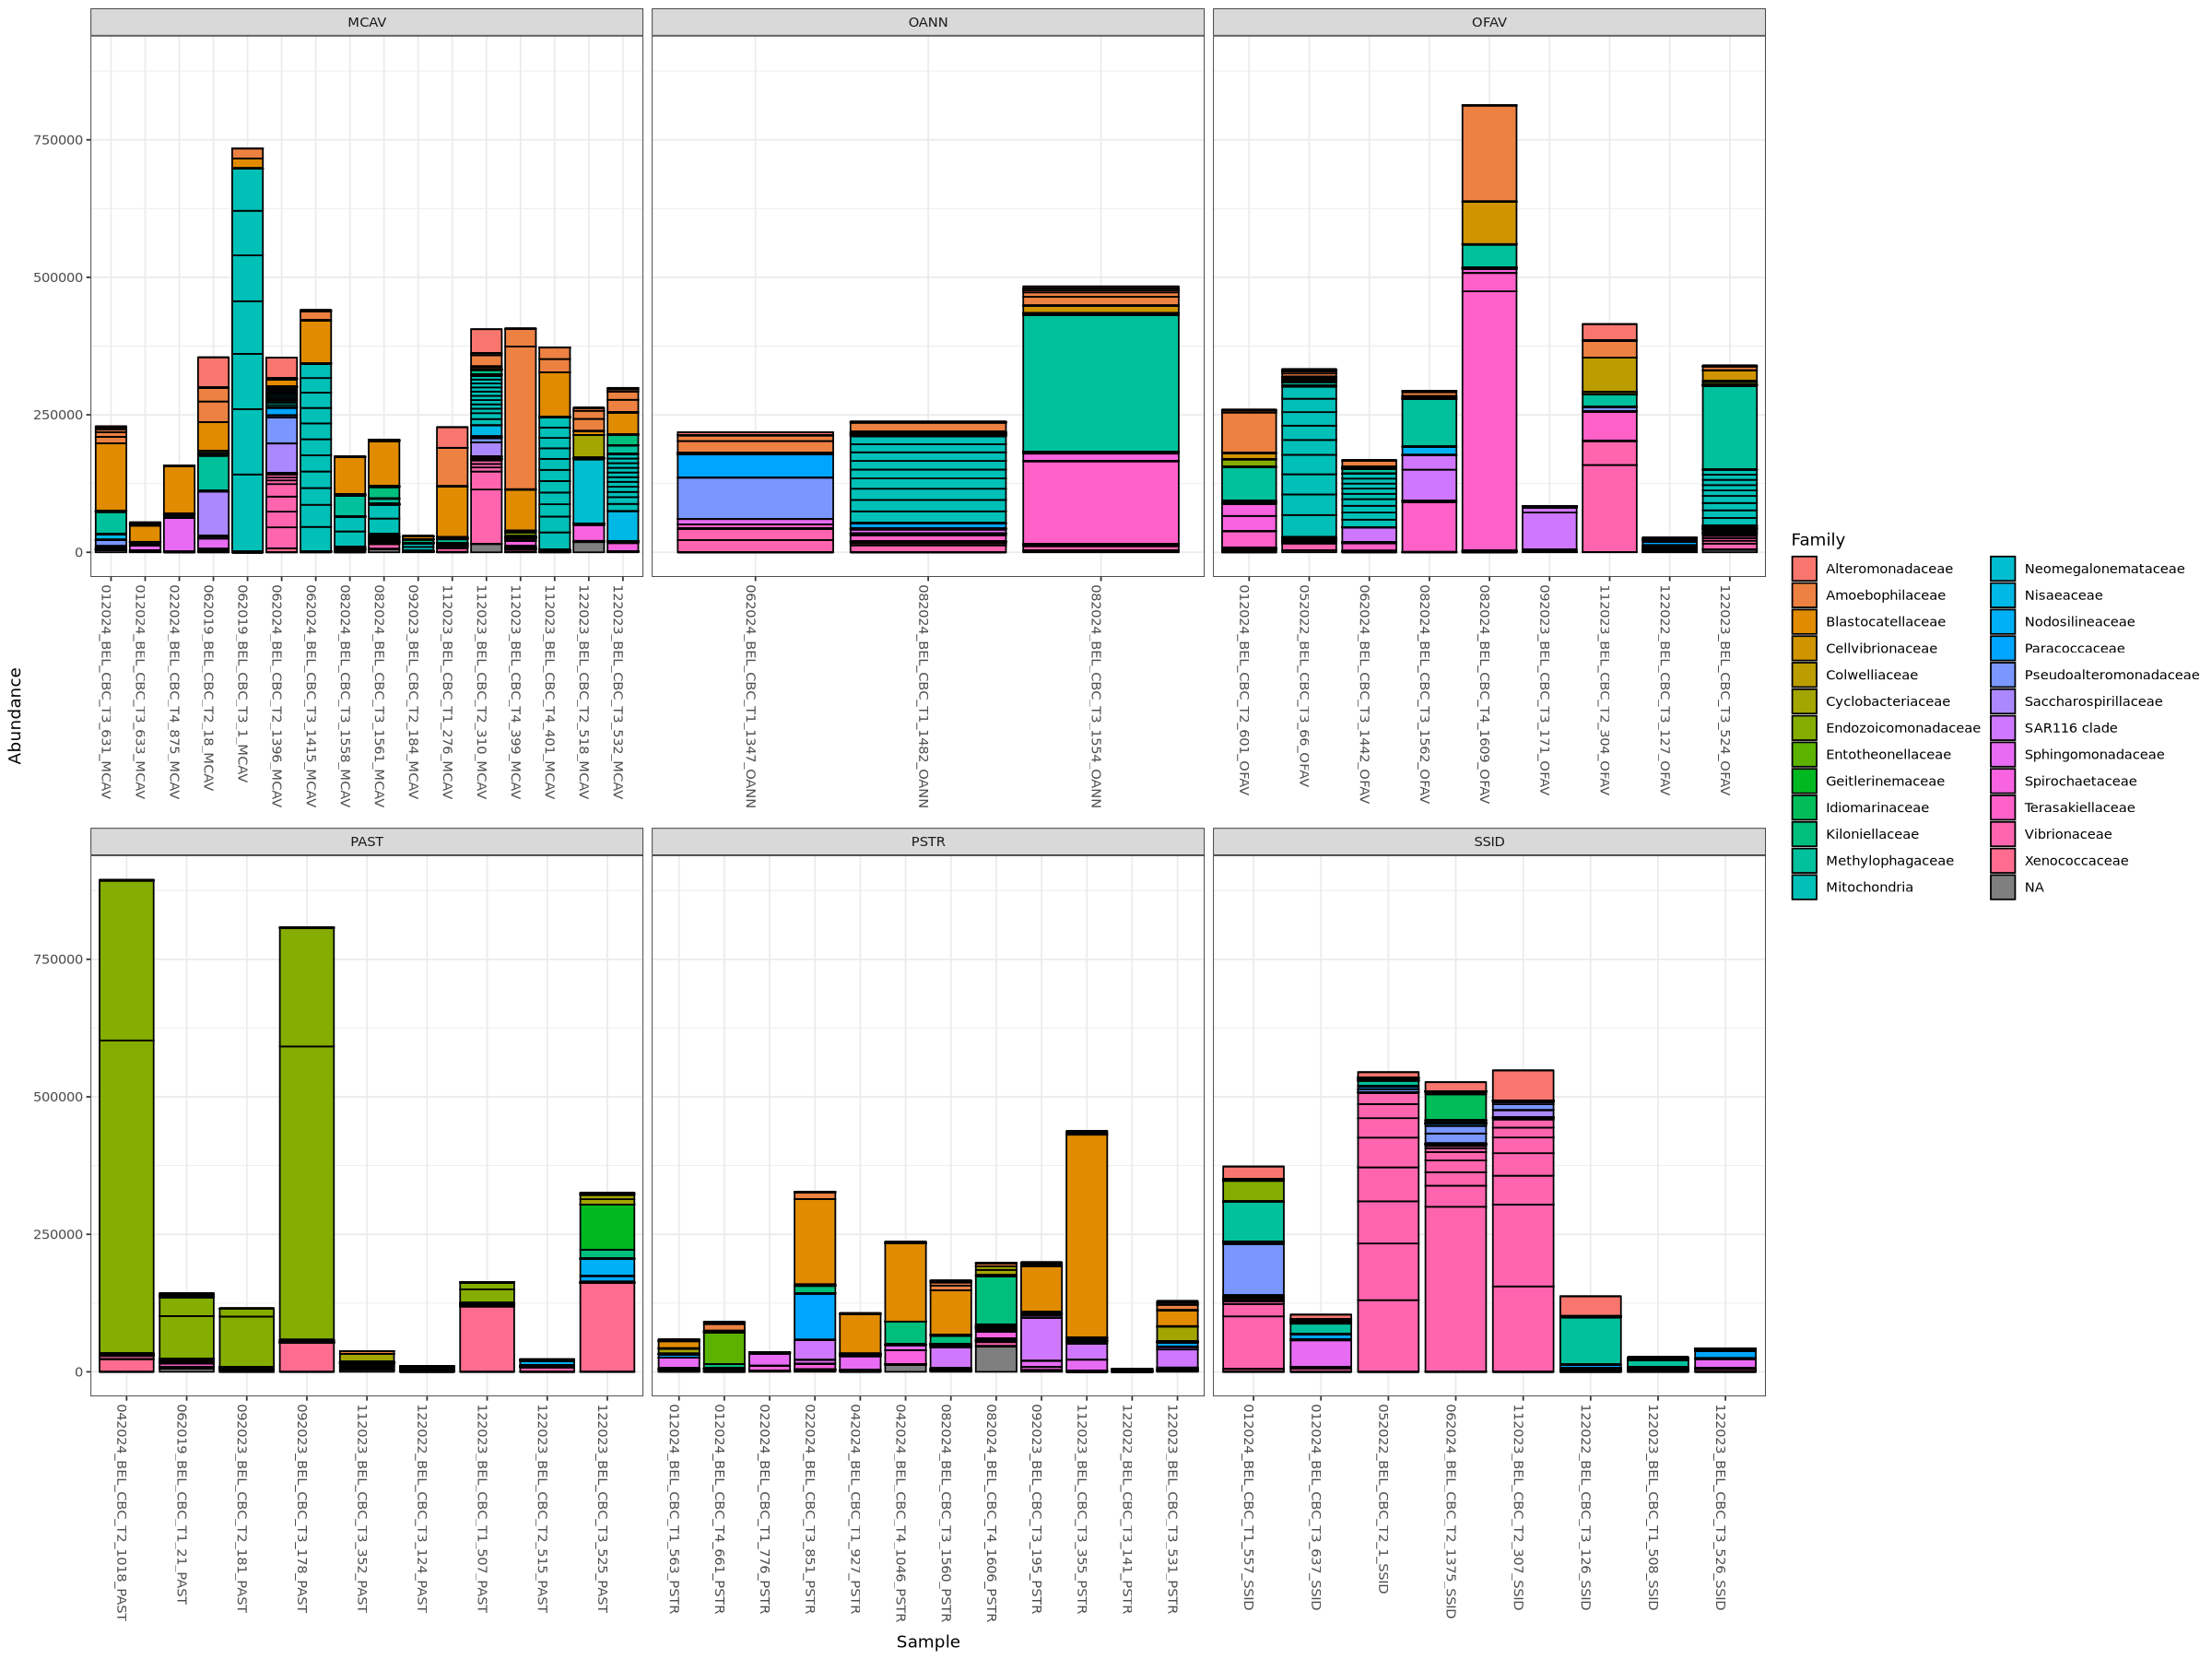

In [12]:
#plot after removing chloroplast
top100_nochlo <- names(sort(taxa_sums(ps_norm_nochlo), decreasing=TRUE))[1:100] 
#ps.top20 <- transform_sample_counts(ps_norm, function(OTU) OTU/sum(OTU)) 
ps.top100_nochlo <- prune_taxa(top100_nochlo, ps_norm_nochlo) 
plot_bar(ps.top100_nochlo, fill="Family") + facet_wrap(~species, scales="free_x")

### remove mitochondria, I think is being overrep in MCAV and OANN family level

In [9]:
#remove chloroplast family
ps_norm_nomit=subset_taxa(ps_norm_nochlo, Family!="Mitochondria")
ps_norm_nomit

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 44609 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 44609 taxa by 6 taxonomic ranks ]

In [10]:
plot_bar(ps_norm_nomit, fill="Phylum")+
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")

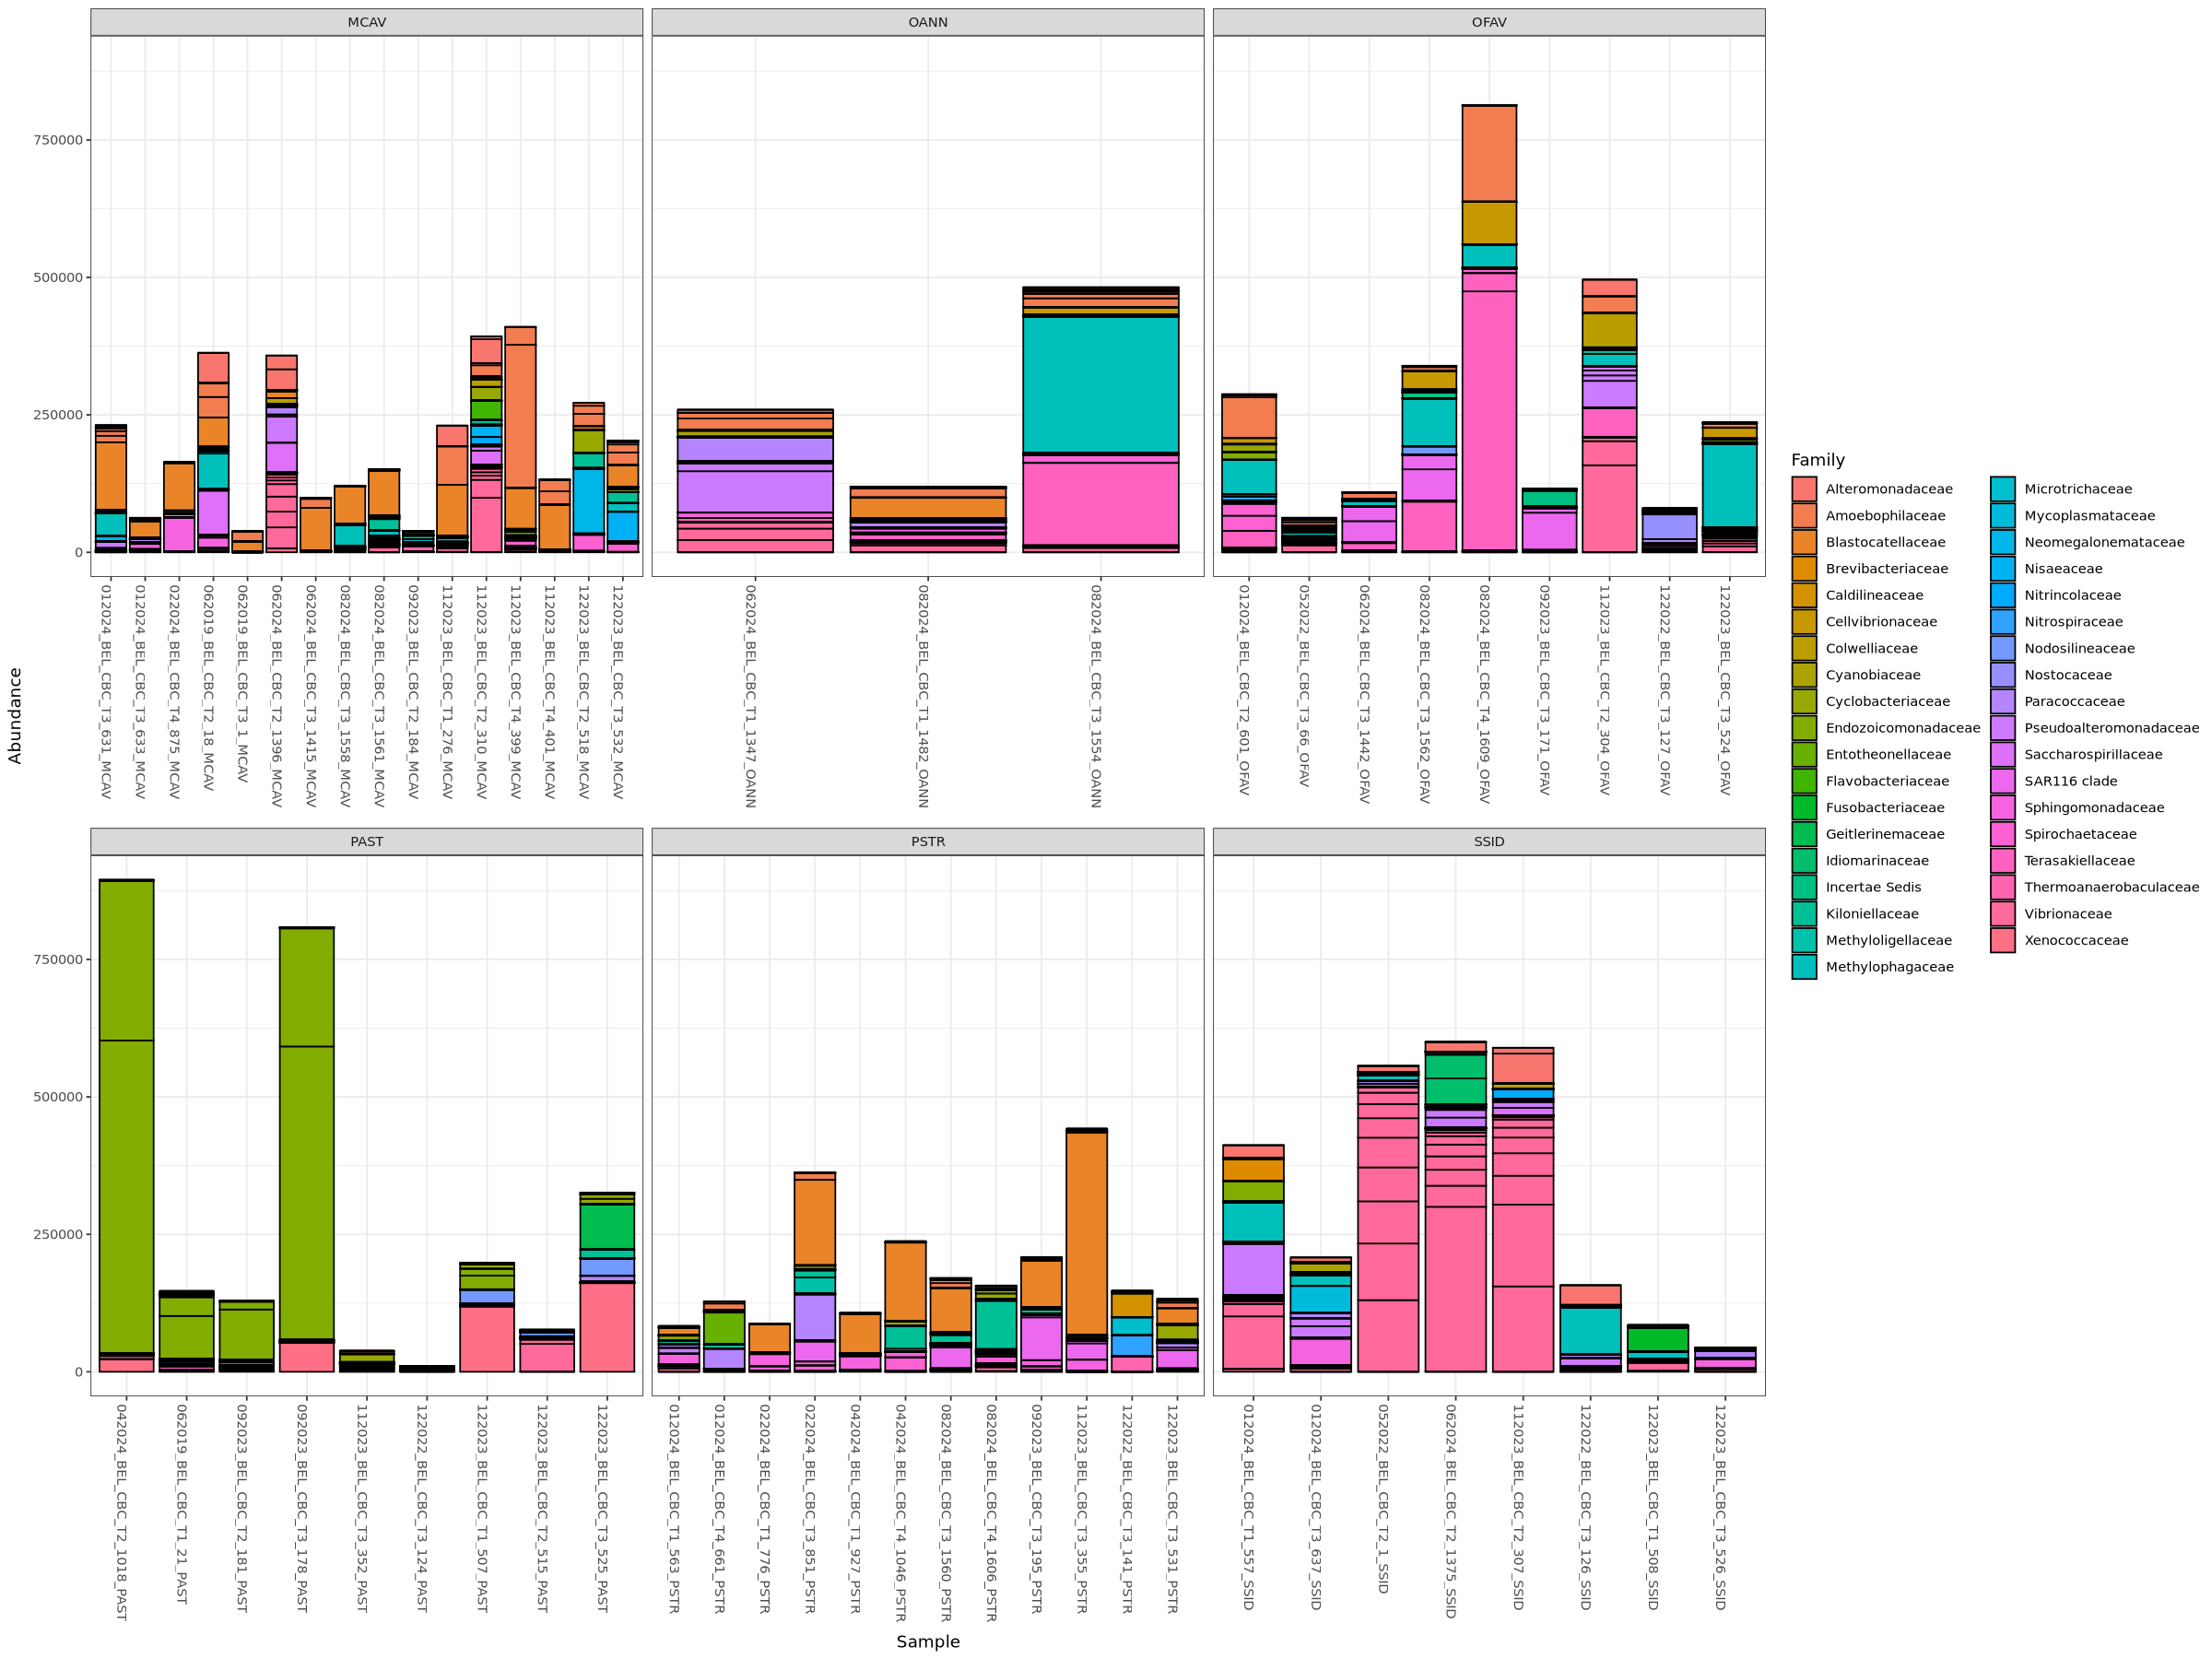

In [14]:
#plot after removing chloroplast
top100_nomit <- names(sort(taxa_sums(ps_norm_nomit), decreasing=TRUE))[1:100] 
#ps.top20 <- transform_sample_counts(ps_norm, function(OTU) OTU/sum(OTU)) 
ps.top100_nomit <- prune_taxa(top100_nomit, ps_norm_nomit) 
plot_bar(ps.top100_nomit, fill="Family") + facet_wrap(~species, scales="free_x")

### great now test this but separate by colony

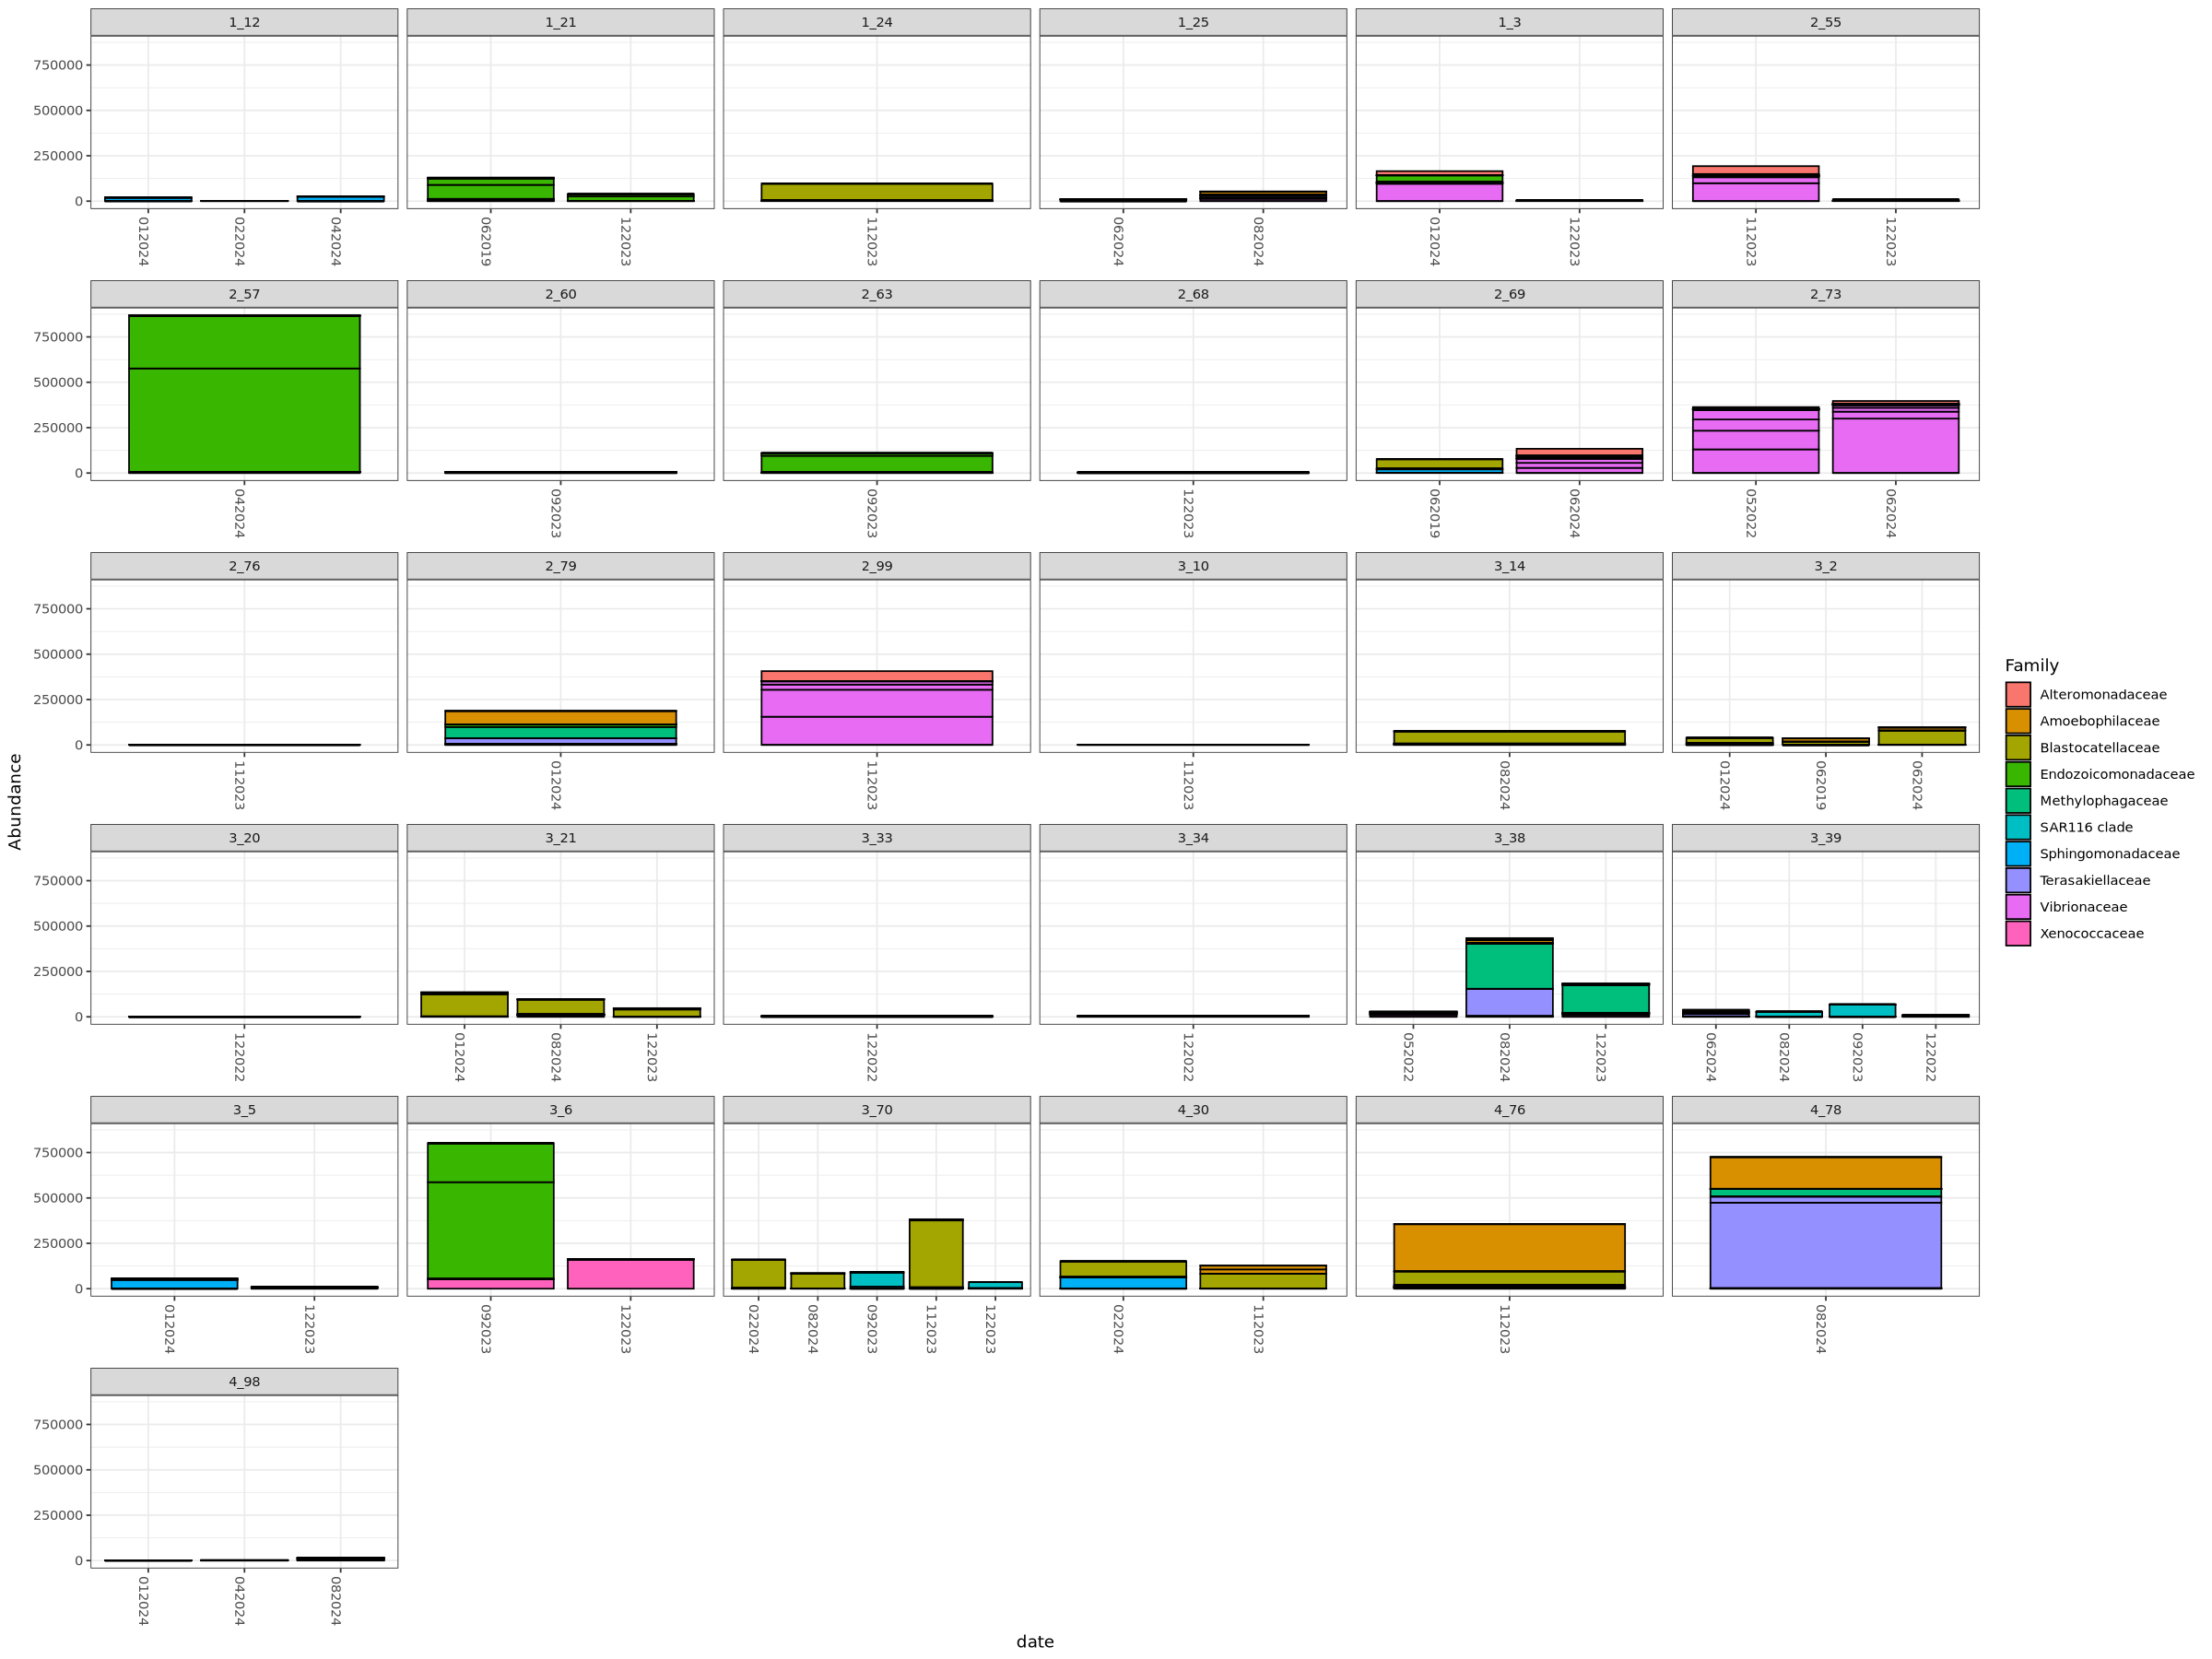

In [21]:
#plot after removing chloroplast
top20_col <- names(sort(taxa_sums(ps_norm_nomit), decreasing=TRUE))[1:20] 
#ps.top20 <- transform_sample_counts(ps_norm, function(OTU) OTU/sum(OTU)) 
ps.top20_col <- prune_taxa(top20_col, ps_norm_nomit) 
plot_bar(ps.top20_col, x="date", fill="Family") + facet_wrap(~colony, scales = "free_x")